In [1]:
#export
from exp.nb_nb01 import *

In [2]:
import librosa

In [3]:
path = './P066201.wav'

In [4]:
y, sr = load_audio(path)

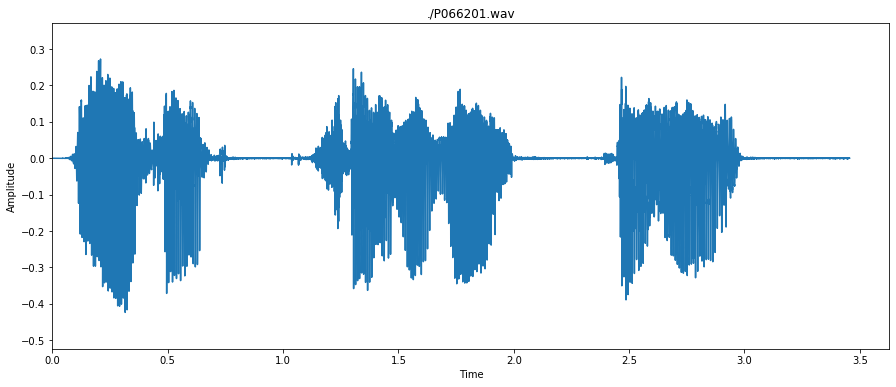

In [5]:
plot_signal(y, sr, title=path)

### Pre-emphasis
<img src='../images/pre-emphasis.png'/>

In [6]:
#export
def pre_emphasis(y, alpha = 0.97):
    return np.append(y[0],y[1:]-alpha*y[:-1])

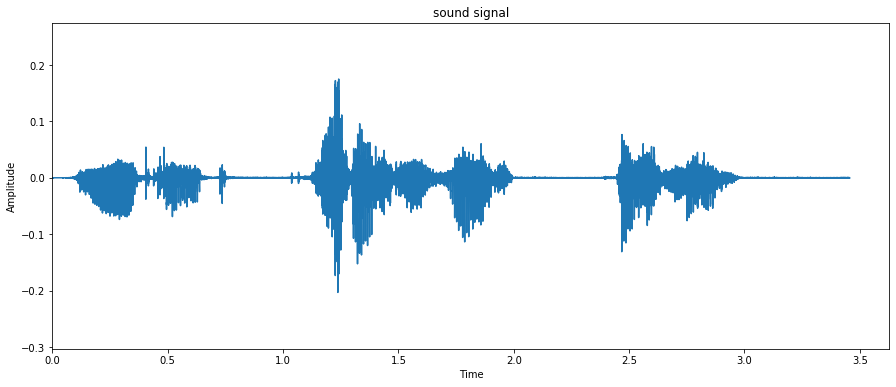

In [7]:
plot_signal(pre_emphasis(y),sr)

### Framing

In [8]:
#export
def framing(y, sr, frame_length = 0.025, stride = 0.01, drop_last = True):
    frame_length, stride_length = int(frame_length*sr), int(stride*sr)
    if stride_length == 0:
        stride_length =frame_length
    frames = []
    for i in range(0,len(y)-frame_length, stride_length):
        frames.append(y[i:i+frame_length])
    if not drop_last:
        remaining = len(y)%frame_length
        frames.append(np.append(y[-remaining:], [0]*remaining))
    return np.array(frames)

In [9]:
frames = framing(pre_emphasis(y),sr)
frames.shape

(344, 400)

In [10]:
len(y)//160

345

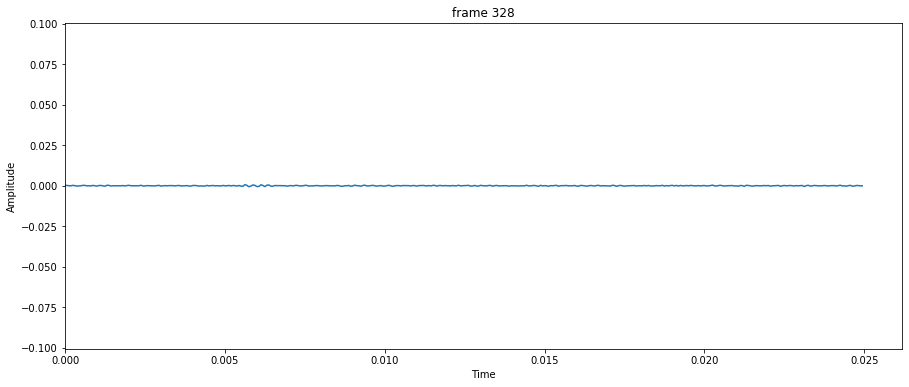

In [11]:
idx = np.random.randint(0,len(frames))
plot_signal(frames[idx],sr, title=f'frame {idx}')

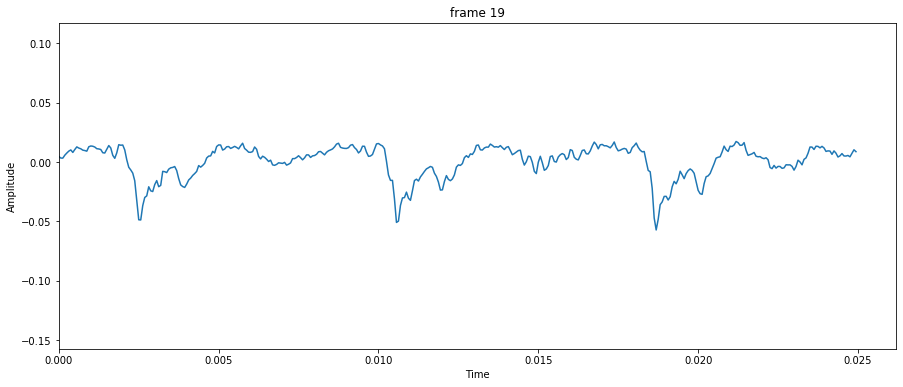

In [12]:
idx = np.random.randint(0,len(frames))
plot_signal(frames[idx],sr, title=f'frame {idx}')

### Windowing

In [13]:
#export
from scipy.signal import triang, hamming, hann

Hanning Window Formula:
\begin{equation*}
w(n) = 0.54 - 0.46cos\left(\frac{2\pi{n}}{M-1}\right)\qquad 0 \leq n \leq M-1
\end{equation*}

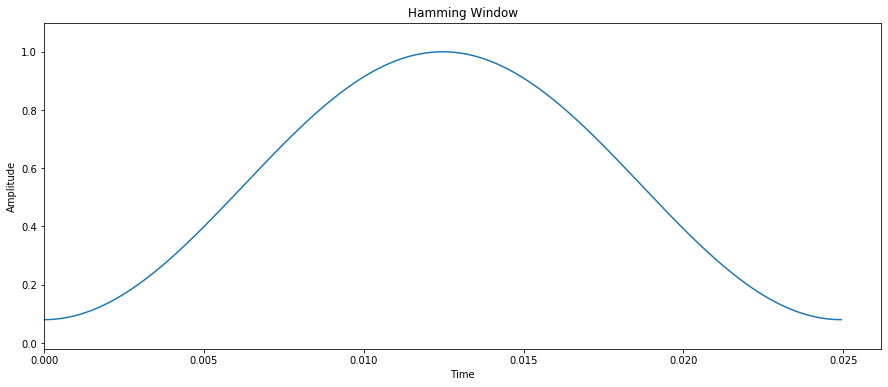

In [14]:
plot_signal(hamming(400),sr , 'Hamming Window')

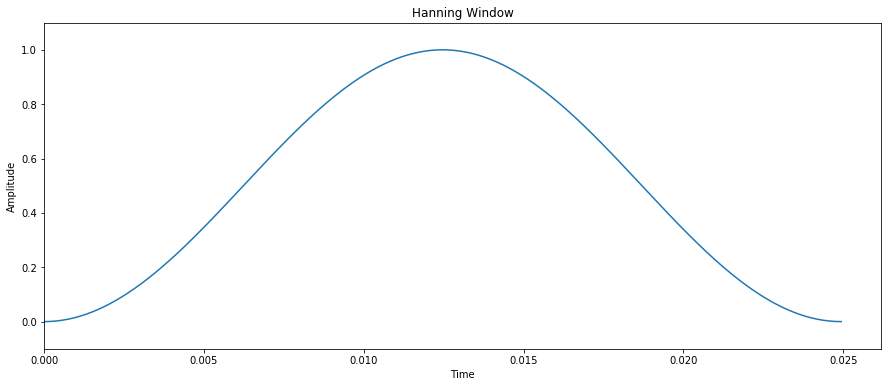

In [15]:
plot_signal(hann(400),sr , 'Hanning Window')

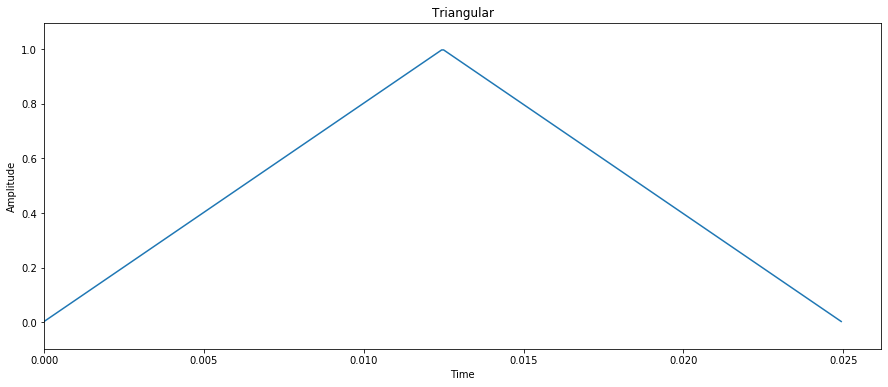

In [16]:
plot_signal(triang(400),sr , 'Triangular')

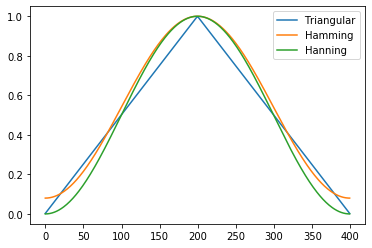

In [17]:
plt.plot(triang(400), label = 'Triangular')
plt.plot(hamming(400), label = 'Hamming')
plt.plot(hann(400), label = 'Hanning')
plt.legend()

/Users/amirmohammadrostami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/Users/amirmohammadrostami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/Users/amirmohammadrostami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10


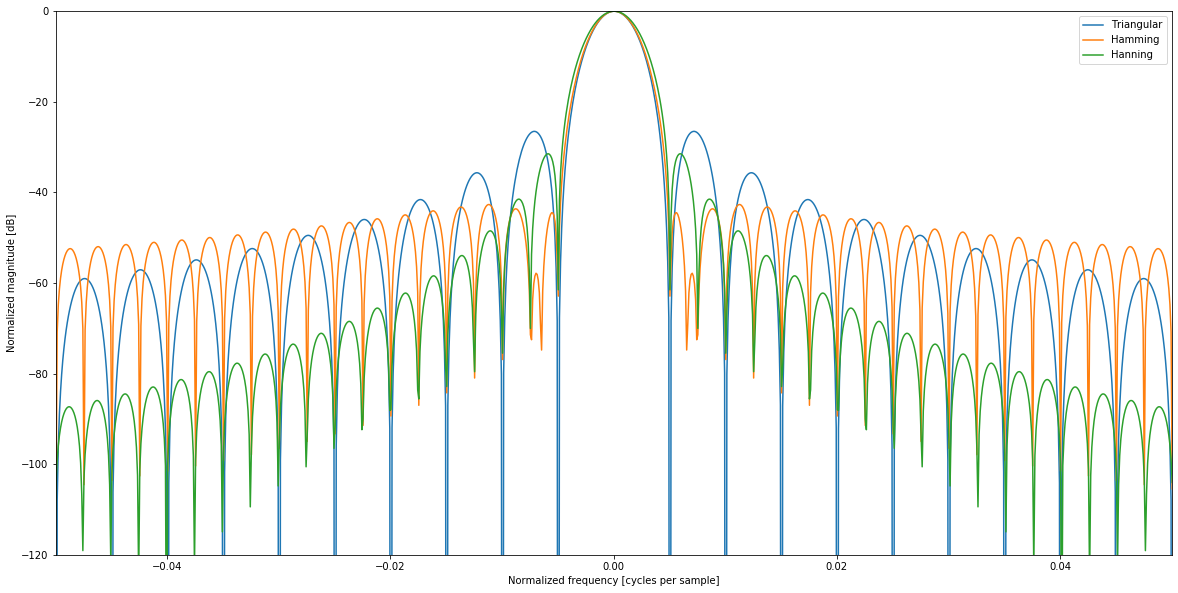

In [18]:
from scipy.fftpack import fft, fftshift

plt.figure(figsize=(20,10))
window = triang(400)
A = fft(window, 10000) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, response, label = 'Triangular')

window = hamming(400)
A = fft(window, 10000) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, response, label = 'Hamming')


window = hann(400)
A = fft(window, 10000) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, response, label = 'Hanning')


plt.axis([-0.05, 0.05, -120, 0])
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.legend()

/Users/amirmohammadrostami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/Users/amirmohammadrostami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/Users/amirmohammadrostami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10


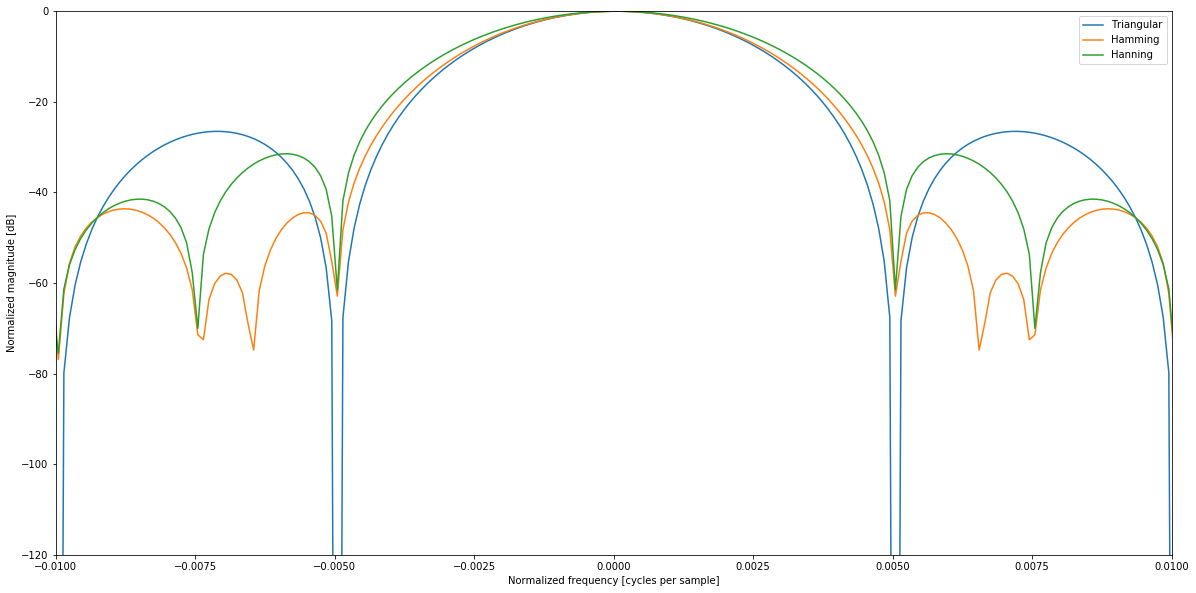

In [19]:
from scipy.fftpack import fft, fftshift

plt.figure(figsize=(20,10))
window = triang(400)
A = fft(window, 10000) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, response, label = 'Triangular')

window = hamming(400)
A = fft(window, 10000) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, response, label = 'Hamming')


window = hann(400)
A = fft(window, 10000) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, response, label = 'Hanning')


plt.axis([-0.01, 0.01, -120, 0])
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.legend()

In [20]:
#export
def windowing(frame, window = hann):
    return frame*hann(len(frame))

In [21]:
#export
def remove_silence(y,sr,frame_length = 0.025, threshold = 0.015):
    frames = framing(y,sr,frame_length,stride=0)
    result = []
    for frame in frames:
        frame_energy = np.mean(np.abs(frame))
        if frame_energy>threshold:
            result+= list(frame)
    return np.array(result)

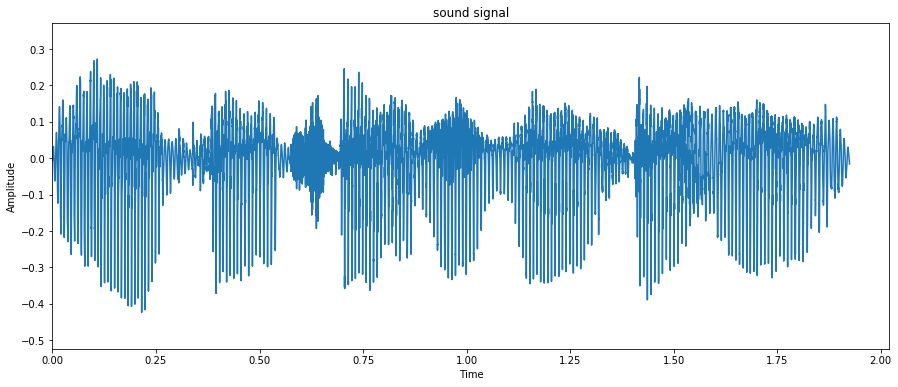

In [22]:
y_without_silence = remove_silence(y,sr)
plot_signal(y_without_silence, sr)

In [23]:
#export
def pre_process(y,
                sr,
                window = hann,
                alpha = 0.97,
                frame_length = 0.025,
                stride = 0.01,
                drop_last = True,
                rs = False):
    if rs:
        y = remove_silence(y,sr)
    y = pre_emphasis(y, alpha)
    frames = framing(y, sr, frame_length, stride, drop_last)
    for i,frame in enumerate(frames):
        frames[i] = windowing(frame, window)
    return frames

In [28]:
frames = pre_process(y,sr)
frames.shape

(344, 400)

In [25]:
!python3 ../notebook2script.py ./nb02_speech_preprocessing.ipynb  

Converted nb02_speech_preprocessing.ipynb to exp/nb_nb02.py
